# 图像锐化
由于图像平滑是低通滤波器，所以我们虽然消除了部分噪声（图像低频分量），但也使边缘文理（图像高频分量）受到了损失。

图像锐化与图像平滑是相反的操作，锐化是通过增强高频分量来减少图像中的模糊，增强图像细节边缘和轮廓，增强灰度反差，便于后期对目标的识别和处理。应用于查找图像梯度边缘。锐化处理在增强图像边缘的同时也增加了图像的噪声。

## 自定义锐化核

对于锐化滤波器来说，权重值加起来和为1。图像与锐化滤波器做卷积，对于感兴趣的像素来说，新像素是用当前像素值乘以9，然后减去8个邻近像素值。如果感兴趣像素与邻近像素有差别，那么这个差别会增加，这样会使得到的图像锐化，因为该像素的值与邻近像素值之间的差距拉大了。

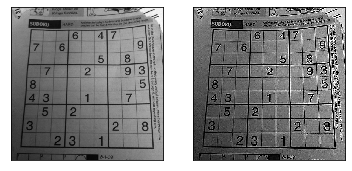

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
 
img = cv.imread("exp_images/sudoku.png",0)

kernel = np.float32([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
dst = cv.filter2D(img,-1,kernel)

plt.subplot(1,2,1),plt.imshow(img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(dst,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

## Sobel算子
Sobel算子是高斯平滑夹微分运算的联合运算，因此它减弱了噪声的影响。使用中可以指定求导的方向（在x方向上求导，或在y方向上求导）。
![](images/2023-08-11-16-52-56.png)


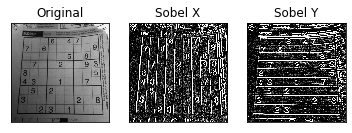

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("exp_images/sudoku.png",0)

sobel_x = cv.Sobel(img,-1,1,0,ksize=5)
sobel_y = cv.Sobel(img,-1,0,1,ksize=5)

plt.subplot(1,3,1),plt.imshow(img,cmap="gray"),plt.title('Original')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobel_x,cmap="gray"),plt.title('Sobel X')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_y,cmap="gray"),plt.title('Sobel Y')
plt.xticks([]),plt.yticks([])
plt.show()

## Laplacian算子
Laplacian算子是二阶微分算子，它具有旋转不变性，即各项同性的性质。Laplacian算子的缺点是：由于为二阶差分，双倍加强了噪声的影响；另外它不能提供边缘的方向信息

![](images/2023-08-11-16-55-14.png)

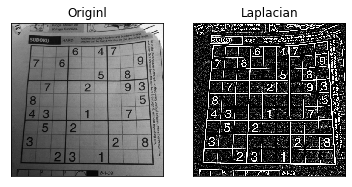

In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

laplacian = cv.Laplacian(img,-1,ksize=5)
plt.subplot(1,2,1),plt.imshow(img,cmap='gray')
plt.title('Originl'),plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(laplacian,cmap='gray')
plt.title('Laplacian'),plt.xticks([]),plt.yticks([])
plt.show()